# KNN 
![](https://static.javatpoint.com/tutorial/machine-learning/images/k-nearest-neighbor-algorithm-for-machine-learning5.png)

- K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
- K-NN uses Euclidean Distance for finding the similarity between the train data and the new given test data to perform classification.
- It is one of the most basic **Unsupervised Learning** algorithm.

### Importing The libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns 


In [107]:
raw_data = pd.read_csv("D:\Document\Machine_Learning\Iris\Iris.csv")

In [108]:
raw_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [109]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [110]:
raw_data_copy = raw_data.drop('Id',axis=1)

In [111]:
raw_data_copy['Species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

### Data Preprocessing

In [115]:
class DataPreprocessing:
    def __init__(self,x):
        self.data = x
        self.data_len = int(len(self.data)*0.7)
        self.col = []
        self.train_data = []
        self.test_data = []
        self.y = None
        self.y_test = []
    def columns_to_replace(self):
        '''
        To select columns with object data type so as to convert them into integer datatype
        '''
        for i in self.data.columns:
            if self.data[i].dtype == 'O':
                self.col.append(i)
    def to_categorical(self):
        '''
        Replaces columns with object data type to integer data type
        '''
        self.columns_to_replace()
        for i in self.col:
            if self.data[i].nunique() == 2:
                self.data[i].replace(to_replace = self.data[i].unique() , value = [0,1] ,inplace = True)
            elif self.data[i].nunique() == 3:
                self.data[i].replace(to_replace = self.data[i].unique() , value = [-1,0,1],inplace = True)
            else:
                self.data[i].replace(to_replace = self.data[i].unique() , value = np.arange(0,self.data[i].nunique()),inplace = True)
                
    def train_test_split(self):
        '''
        Split the dataset into train and test dataset
        '''
        np.random.seed(42)
        self.to_categorical()
        for i in range(self.data_len):
            self.train_data.append(np.array(self.data.iloc[np.random.randint(0,self.data.shape[0])]))
        for i in range(len(self.data) - self.data_len):
            self.test_data.append(np.array(self.data.iloc[np.random.randint(0,self.data.shape[0])]))
        return self.train_data,self.test_data

In [116]:
data = DataPreprocessing(raw_data_copy)

In [117]:
train,test = data.train_test_split()

In [118]:
raw_data_copy['Species'].value_counts()

 1    50
 0    50
-1    50
Name: Species, dtype: int64

#### Data Visualization

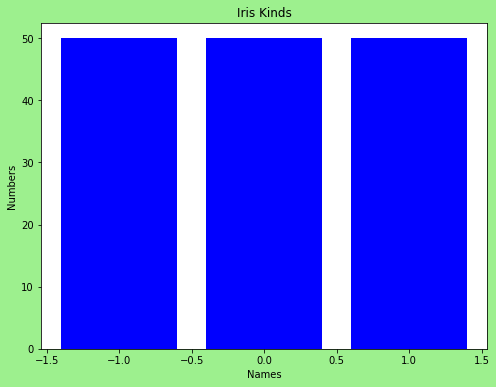

In [119]:
plt.figure(figsize = (8,6),facecolor='#9DF08E')
plt.bar(raw_data_copy['Species'].unique(), raw_data_copy['Species'].value_counts(), color ='b')
plt.title('Iris Kinds')
plt.xlabel('Names')
plt.ylabel('Numbers')
plt.show()

<Figure size 432x288 with 0 Axes>

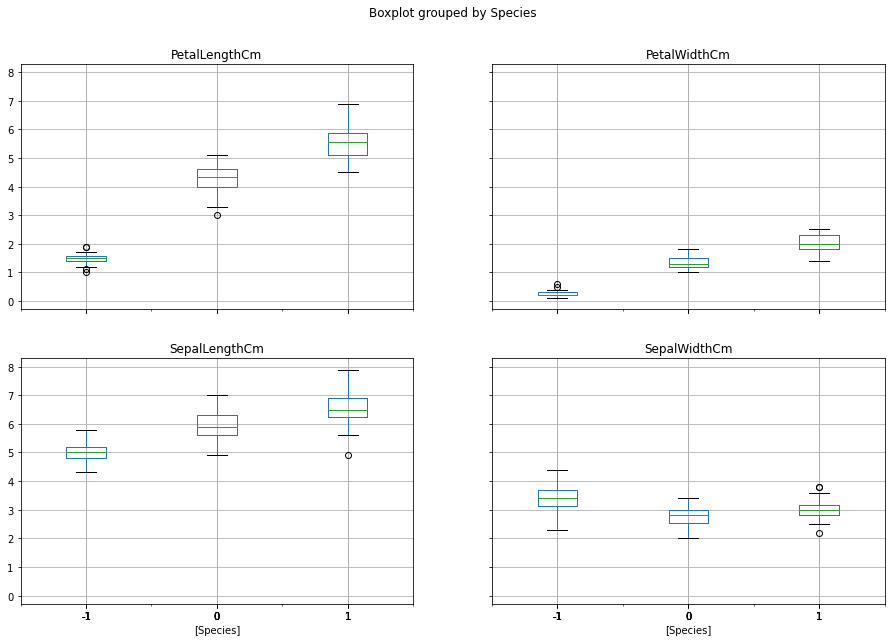

In [120]:
plt.figure()
raw_data_copy.boxplot(by="Species", figsize=(15, 10))
plt.show()

### KNN Algorithm

## Euclidean Distance 
Euclidean distance between two points in Euclidean space is the length of a line segment between the two points. It can be calculated from the Cartesian coordinates of the points using the Pythagorean theorem.
$$d(p,q) = \sqrt{\sum_{j=0}^{n}{(q_i - p_i)^2}}$$

In [143]:
class KNN:
    def __init__(self,train,test,y_test,k):
        self.train = train
        self.test = test
        self.y_test = y_test
        self.k = k   
        self.y = []
    def euclidean_distance(self,row1 , row2):
        '''
        Calculate Euclidena Distance between two data points
        Output:
        Returns the sqrt Euclidean distance
        '''
        dist = 0
        for i in range(len(row1) - 1):        
            dist += (row1[i] - row2[i]) ** 2
        return sqrt(dist)
    def get_neighbours(self,test_row):
        '''
        Calculate the k nearest neighbours
        '''
        distances = []
        for i in self.train:
            d = self.euclidean_distance(test_row,i)
            distances.append((i,d))
        distances.sort(key=lambda tup:tup[1])
        k_nearest = []
        for i in range(self.k):
            k_nearest.append(distances[i][0])
        return k_nearest
    def make_predictions(self,test_row):
        '''
        Returns prediction about the class using the get_neighbours 
        '''
        neighbours = self.get_neighbours(test_row)
        output = [row[-1] for row in neighbours]
        predictions = max(set(output),key = output.count)
        return predictions
    def kNN(self):
        '''
        Applying the algorithm to make predictions.
        '''
        prediction = []
        for row in self.test:
            output = self.make_predictions(row)
            prediction.append(output)
        return prediction
    def accuracy(self,y_pred):
        '''
        Calculates the accuracy of the algorithm 
        '''
        correct = 0
        
        for i in self.test:
            self.y.append(i[-1])
        for i in range(len(y_pred)):
            if y_pred[i] == self.y[i]:
                correct +=1
        return (correct/len(self.y)) * 100

In [144]:
knn = KNN(train,test,y_test,3)

In [145]:
y_pred = knn.kNN()

In [146]:
y_pred

[1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 0.0,
 -1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 0.0,
 -1.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0]

In [147]:
knn.accuracy(y_pred)

93.33333333333333